In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Understanding Data

In [2]:
df = pd.read_csv("Obesity prediction.csv")
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [4]:
df.duplicated().sum()

24

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# Preprocessing

In [8]:
# Memisahkan fitur dan target
x = df.drop(['Obesity'], axis=1)
y = df['Obesity']

In [9]:
# Memisahkan fitur numerik dan categorical
df_numerik = x.select_dtypes(include=['int64', 'float64'])
df_categorical = x.select_dtypes(include=['object', 'category'])

## Preprocessing numerik

In [10]:
df_numerik

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numerik_scaler = scaler.fit_transform(df_numerik)
joblib.dump(scaler, 'scaler_numerik.pkl')
print('Scaler berhasil disimpan')

Scaler berhasil disimpan


## Preprocessing categorical

In [11]:
df_categorical

,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [56]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
joblib.dump(encode, 'encode_categorical.pkl')
print('encode telah disimpan')
df['Gender'] = encode.fit_transform(df['Gender'])
df['family_history'] = encode.fit_transform(df['family_history'])
df['FAVC'] = encode.fit_transform(df['FAVC'])
df['CAEC'] = encode.fit_transform(df['CAEC'])
df['SMOKE'] = encode.fit_transform(df['SMOKE'])
df['SCC'] = encode.fit_transform(df['SCC'])
df['CALC'] = encode.fit_transform(df['CALC'])
df['MTRANS'] = encode.fit_transform(df['MTRANS'])
df['Obesity'] = encode.fit_transform(df['Obesity'])
df.head()


encode telah disimpan


C:\Users\irfan\AppData\Local\Temp\ipykernel_5040\341039283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = encode.fit_transform(df['Gender'])
C:\Users\irfan\AppData\Local\Temp\ipykernel_5040\341039283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_history'] = encode.fit_transform(df['family_history'])
C:\Users\irfan\AppData\Local\Temp\ipykernel_5040\341039283.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [27]:
import numpy as np

# Gabungkan kembali hasil preprocessing
df_final = pd.concat([pd.DataFrame(df_numerik_scaler, columns=df_numerik.columns),
                      df.reset_index(drop=True)], axis=1)
print("Data setelah preprocessing:")
print(df_final)


Data setelah preprocessing:
           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.526613 -0.887408 -0.872985 -0.788364  0.390906 -0.007810 -1.186977   
1    -0.526613 -1.960788 -1.178508  1.082164  0.390906  1.636552  2.328908   
2    -0.212507  1.044677 -0.376509 -0.788364  0.390906 -0.007810  1.156947   
3     0.415705  1.044677  0.005395  1.082164  0.390906 -0.007810  1.156947   
4    -0.369560  0.830001  0.112328 -0.788364 -2.225418 -0.007810 -1.186977   
...        ...       ...       ...       ...       ...       ...       ...   
2082 -0.530250  0.086470  1.701376  1.082164  0.390906 -0.454848  0.777546   
2083 -0.372239  0.492788  1.790528  1.082164  0.390906  0.000626  0.385081   
2084 -0.287258  0.531665  1.788482  1.082164  0.390906  0.081303  0.470422   
2085  0.001389  0.394745  1.775393  1.082164  0.390906  1.393744  0.148013   
2086 -0.108112  0.388155  1.780205  1.082164  0.390906  1.412118  0.015986   

           TUE  Gender        Age  

In [28]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(df_final, y)
anova_results = pd.DataFrame({'Feature': df_final.columns, 'F-Score': f_scores, 'p-Value': p_values})
print(anova_results.sort_values(by='F-Score', ascending=False))


           Feature      F-Score        p-Value
24         Obesity          inf   0.000000e+00
2           Weight  1926.517611   0.000000e+00
11          Weight  1926.517611   0.000000e+00
8           Gender   159.433043  6.852093e-167
12  family_history   145.743832  1.468826e-154
14            FCVC   110.454307  3.796507e-121
3             FCVC   110.454307  3.796507e-121
16            CAEC    77.546005   1.212147e-87
0              Age    76.195373   3.246862e-86
9              Age    76.195373   3.246862e-86
13            FAVC    43.204572   6.035625e-50
1           Height    37.437653   2.518501e-43
10          Height    37.437653   2.518501e-43
22            CALC    33.513167   8.980489e-39
23          MTRANS    27.182901   2.354703e-31
4              NCP    26.774811   7.132002e-31
15             NCP    26.774811   7.132002e-31
19             SCC    22.656834   5.345447e-26
6              FAF    18.176809   1.155420e-20
20             FAF    18.176809   1.155420e-20
18           

C:\Users\irfan\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


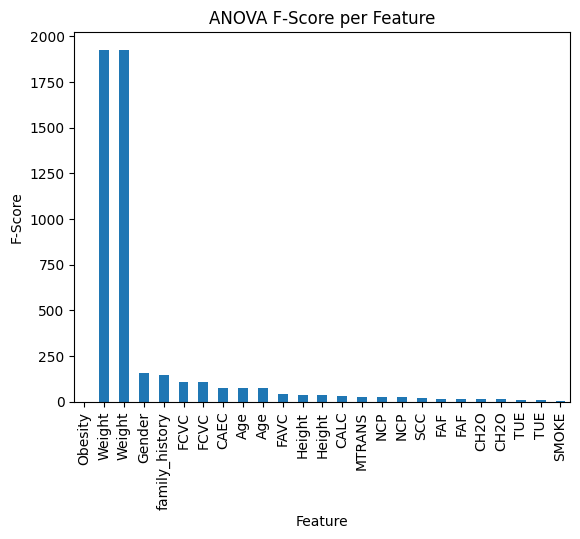

In [29]:
anova_results.sort_values(by='F-Score', ascending=False).plot.bar(x='Feature', y='F-Score', legend=False)
plt.ylabel('F-Score')
plt.title('ANOVA F-Score per Feature')
plt.show()

In [57]:
selected_features = ['Weight', 'Gender', 'family_history', 'FCVC', 'Height']
x_selected = df_final[selected_features]
joblib.dump(x_selected, 'x_selected.pkl')
print('feature selection done')

feature selection done


# Build a model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, x_selected, y, cv=5, scoring='accuracy')
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9569045242275079


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9545454545454546


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
model.fit(X_test, y_test)
test_accuracy = model.score(X_train, y_train)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9131216297183943


In [49]:
from sklearn.metrics import confusion_matrix

model.fit(x_selected, y)
y_pred = model.predict(x_selected)
print(confusion_matrix(y, y_pred))


[[267   0   0   0   0   0   0]
 [  0 282   0   0   0   0   0]
 [  0   0 351   0   0   0   0]
 [  0   0   0 297   0   0   0]
 [  0   0   0   0 324   0   0]
 [  0   0   0   0   0 276   0]
 [  0   0   0   0   0   0 290]]


# Create Test Case

0 : Insufficient Weight,
1 : Normal Weight,
2 : Obesity Type I,
3 : Obesity Type II,
4 : Obesity Type III,
5 : Overweight Level I,
6 : Overweight Level II,

In [51]:
# Contoh test case (data baru)
test_case = pd.DataFrame({
    'Gender' : [1],
    'Age' : [30],
    'Height' :	[1.80],
    'Weight' : [100],
    'family_history' : [0],
    'FAVC' : [1],
    'FCVC' : [4.0],
    'NCP' : [1.0],
    'CAEC' : [2],
    'SMOKE'	: [1],
    'CH2O' : [2.0056],
    'SCC' :	[1],
    'FAF' :	[3.0],
    'TUE' :	[1.0],
    'CALC' : [3],
    'MTRANS' : [4]
})
# Pastikan urutan kolom sesuai dengan X_train
test_case = test_case[x_selected.columns]  # Sesuaikan urutan kolom

# Prediksi menggunakan model
predicted_class = model.predict(test_case)
predicted_probabilities = model.predict_proba(test_case)

# Tampilkan hasil
print("Test Case Input:")
print(test_case)

print("\nPredicted Class:", predicted_class[0])
print("Class Probabilities:", predicted_probabilities)


Test Case Input:
   Weight  Weight  Gender  family_history  FCVC  FCVC  Height  Height
0     100     100       1               0   4.0   4.0     1.8     1.8

Predicted Class: Obesity_Type_I
Class Probabilities: [[0.01 0.01 0.34 0.24 0.15 0.2  0.05]]


In [58]:
joblib.dump(model, 'obesity_prediction_random_forest.pkl')
print("Model berhasil disimpan!")

Model berhasil disimpan!
